In [1]:
import numpy as np
import grape as utils
from scipy.linalg import expm
import matplotlib.pyplot as plt
import copy
from scipy.optimize import minimize
from scipy.optimize import Bounds

In [15]:
np.repeat(x2,2)

array([-2.94650661e-01, -2.94650661e-01,  8.18969715e-01,  8.18969715e-01,
       -8.72864686e-01, -8.72864686e-01, -6.51449500e-01, -6.51449500e-01,
        1.00000000e+00,  1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
        1.00000000e+00,  1.00000000e+00, -3.05380167e-06, -3.05380167e-06,
       -1.00000000e+00, -1.00000000e+00, -1.00000000e+00, -1.00000000e+00])

In [23]:
nions=1
max_amp = 2 * np.pi * 25e3  
sx,sy,sz, ssx, ssy, ssz, Had = utils.get_spinops(nions,1/300)
utarg = expm(-1j * (np.pi / 2 ) * sx[0] / 2) 

nsegments = 5 * 20
del_t = 12e-6 / 20
x0 = np.random.rand(nsegments*2);
# x2 = np.load('x120s_optimized.npy'); 
# x0 = utils.smooth_pulse(x2,60,2)
# x0 = np.load('x30s_optimized.npy'); 
x2 = np.asarray([-2.94650661e-01,  8.18969715e-01, -8.72864686e-01, -6.51449500e-01,
        1.00000000e+00,  1.00000000e+00,  1.00000000e+00, -3.05380167e-06,
       -1.00000000e+00, -1.00000000e+00]) # for no rfi, 5, 12e-6, fun 1.6681861447764845e-07
x1 = np.repeat(x2,10)
x0 = utils.smooth_pulse(x1,50,2)

rfi=[1]+np.linspace(0,1/300,5).tolist()
# rfi=[1]
print(utils.calc_fidelity6_ct(x0, nsegments, rfi, ssx, ssy, utarg, del_t, nions, max_amp))
result = minimize(utils.calc_fidelity6_ct,
         x0=x0,
         jac=utils.calc_grad2,
         args = (nsegments, rfi, ssx, ssy, utarg, del_t, nions, max_amp),
         method='BFGS',
         options={'disp':True, 'gtol':1e-20 },
        )
result

0.2591750824576522
         Current function value: 0.000243
         Iterations: 10
         Function evaluations: 117
         Gradient evaluations: 105


/Users/katiyar/opt/anaconda3/envs/oneQgate/lib/python3.12/site-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 0.00024261684661297522
        x: [-3.075e-01 -3.079e-01 ... -9.911e-01 -9.915e-01]
      nit: 10
      jac: [ 2.482e-08  2.165e-08 ...  2.919e-08  2.895e-08]
 hess_inv: [[ 1.712e+02  1.728e+02 ... -6.583e+01 -6.669e+01]
            [ 1.728e+02  1.766e+02 ... -6.829e+01 -6.897e+01]
            ...
            [-6.583e+01 -6.829e+01 ...  4.866e+01  4.508e+01]
            [-6.669e+01 -6.897e+01 ...  4.508e+01  4.388e+01]]
     nfev: 117
     njev: 105

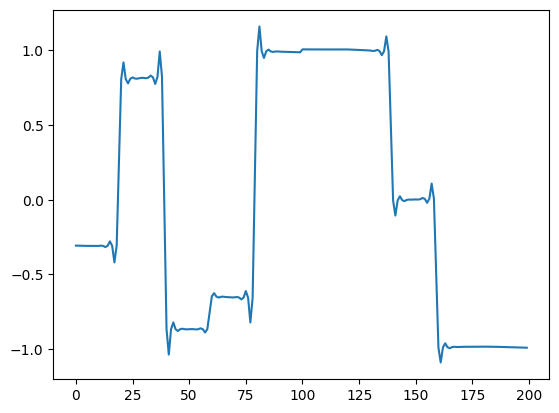

In [25]:
plt.plot(result.x)

In [24]:
print(utils.calc_fidelity5(result.x , nsegments, np.asarray([[1,1]]) , ssx, ssy, utarg, del_t, nions, max_amp))
print(utils.calc_fidelity5(result.x*1/300 , nsegments, np.asarray([[1,1]]) , ssx, ssy, np.eye(2), del_t, nions, max_amp))


0.004785838966236966
9.49792355875445e-06


In [14]:
nions=1
max_amp = 2 * np.pi * 25e3  
sx,sy,sz, ssx, ssy, ssz, Had = utils.get_spinops(nions,1/300)
utarg = expm(-1j * (np.pi / 2 ) * sx[0] / 2)
rffull = np.linspace(0,1/300,50); rffull[0]=1

nsegments = 120
del_t = 0.25e-6

numrfi_add = 2
for j in range(1,2):
        if j==1:
                x0 = np.load('x120s_optimized.npy'); 
        else:
                x0 = result.x
                
        rfi=rffull[0:numrfi_add*j+1].tolist()
        print(f"running for {j}")
        print(rfi)
        result = minimize(utils.calc_fidelity6_ct,
         x0=x0,
         jac=utils.calc_grad2,
         args = (nsegments, rfi, ssx, ssy, utarg, del_t, nions, max_amp),
         method='BFGS',
         options={'disp':True, 'gtol':1e-9},
        )
        result

running for 1
[1.0, 6.802721088435374e-05, 0.00013605442176870748]
         Current function value: 0.000024
         Iterations: 0
         Function evaluations: 46
         Gradient evaluations: 34


/Users/katiyar/opt/anaconda3/envs/oneQgate/lib/python3.12/site-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


In [35]:
# one point optimization
print(utils.calc_fidelity6_ct(result.x, nsegments, [1], ssx, ssy, utarg, del_t, nions, max_amp))
print(utils.calc_fidelity6_ct(result.x, nsegments, [1/300], ssx, ssy, utarg, del_t, nions, max_amp))


2.220446049250313e-12
0.002052226979465388


In [51]:
# two point optimization
print(utils.calc_fidelity6_ct(result.x, nsegments, [1], ssx, ssy, utarg, del_t, nions, max_amp))
print(utils.calc_fidelity6_ct(result.x, nsegments, [1/300], ssx, ssy, utarg, del_t, nions, max_amp))

2.1122336556955723
0.7895345174480095


In [16]:
xx = np.load('x120s_optimized.npy')
print(utils.calc_fidelity6_ct(xx, nsegments, [1/300], ssx, ssy, utarg, del_t, nions, max_amp))


0.13166070319314827
